## K-Nearest Neighbors Classifier on Iris Dataset

Lets jump right into it by importing the required libraries.

In [74]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets, model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap

iris = datasets.load_iris()


# make sure everything was correctly imported
iris.data.shape, iris.target.shape


((150, 4), (150,))

### Building data sets
Let's start the construction of the K-NN model by splitting the whole data set into train data set and test data set. Play around with 'random_state' to generate different split.

In [75]:
from sklearn.model_selection import train_test_split
X = iris.data  # take all the features
y = iris.target

## To do: split the data set into training and testing data set with size 100/50 respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=30)

## check the training and testing data size

X_train.data.shape, X_test.data.shape, y_train.data.shape, y_test.data.shape

((100, 4), (50, 4), (100,), (50,))

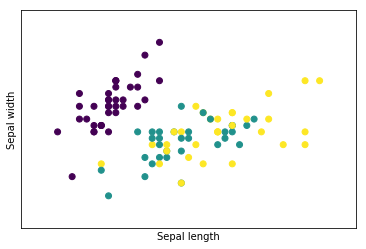

In [76]:
# import training data to visualize
x = X_train[:, :2]  # we only take the first two features.
y = y_train


x_min, x_max = x[:, 0].min() - .5, x[:, 0].max() + .5
y_min, y_max = x[:, 1].min() - .5, x[:, 1].max() + .5


# Plot the training points
plt.scatter(x[:, 0], x[:, 1], c=(0.2*y))
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

plt.show()

Great!  Now that we have all of our data set up, we can start playin with the K-NN model!

### Building the model
We will start by putting the Scikit-Learn K-NN model into a function so we can easily call it and adjust it.

In [77]:
def knn_classifier(k, test_data, test_target, train_data, train_target):
    """k: number of neighbors to use in classication
    test_data: the data/targets used to test the classifier
    train_data: the data/targets used to classify the test_data
    """

    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_data, train_target)
    y_pred = knn.predict(test_data)
    accuracy = accuracy_score(test_target, y_pred)
    ## To do: buildi the knn_classifier using sklearn.neighbors.KNeighborsClassifier; 
    ## return the predicted test labels or testing accuracy
    ## Hint: check the usage of sklearn.neighbors.KNeighborsClassifier and sklearn.metrics.accuracy_score
    return y_pred, accuracy
    

### Testing

Now lets see how this model performs on test sets.

In [78]:
y_pred, accuracy = knn_classifier(5, x_test, y_test, x_train, y_train)
print('The accuracy of our classifier is : %d%%' %(accuracy*100))

The accuracy of our classifier is : 92%


### Varying parameters
Change the variable K in knn model to see how it will affect the accuracy on test data. 

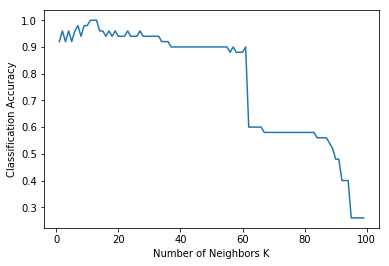

In [79]:
# creating list for accuracy and k
acc_list = []
neighbor_list = range(1,100,1)
for k in neighbor_list:
    y_pred, acc = knn_classifier(k, X_test, y_test, X_train, y_train)
    acc_list.append(acc)

# plot the figure of accuracy varying with number of neighbors K
plt.plot(neighbor_list, acc_list)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Classification Accuracy')
plt.show()


### Extensions: Parameter Tuning with Cross Validation
We’ll explore a method that can be used to tune the hyperparameter K. Cross-validation can be used to estimate the test error associated with a learning method in order to evaluate its performance, or to select the appropriate level of flexibility.

k-fold cross validation (the k is totally unrelated to K) involves randomly dividing the training set into k groups, or folds, of approximately equal size. The first fold is treated as a validation set, and the method is fit on the remaining k−1 folds. The misclassification rate is then computed on the observations in the held-out fold. This procedure is repeated k times; each time, a different group of observations is treated as a validation set. This process results in k estimates of the test error which are then averaged out.

ValueError: x and y must have same first dimension, but have shapes (25,) and (0,)

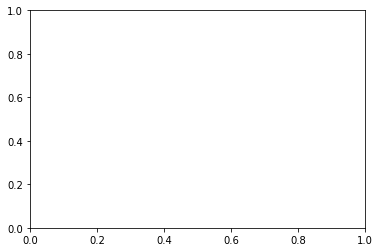

In [80]:
from sklearn.model_selection import cross_val_score
# creating list for accuracy and k
acc_list = []
neighbor_list = range(1,50,2)

# empty list that will hold cv scores
cv_scores = []

# To do: perform 10-fold cross validation
# Hint: check the usage of cross_val_score


# plot the curve of validation accuracy varing with different K    
plt.plot(neighbor_list, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Cross validation classification accuracy')
plt.show()

Did you notice the difference of best K when tuned on test data and on validation data? How would you interpret this?